> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [tmdb movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [7]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies (1).csv')
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
# Display the number of missing values for each column . 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# Check for duplicated rows:
df.duplicated().sum()

1

In [10]:
# display duplicate values
df[df.duplicated()]

TypeError: __init__() got an unexpected keyword argument 'max_rows'

         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline     ...       \
2090  Dwight H. Little  Survival is no game     ...        

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]

In [13]:
# Display summary statistics for the dataset
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

In [14]:
# column indexes/labels
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [15]:
df.drop(
    ['homepage','tagline','production_companies','keywords','overview'\
     ,'imdb_id','id','release_date'], inplace = True, axis = 1)

In [16]:
# check for data change
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [18]:
#drop any missing values
df.dropna(inplace = True)

In [19]:
#drop rows that contain zeros values in (revenue_adj,budget_adj,runtime)
zero_data = df[(df.revenue_adj == 0)|(df.budget_adj == 0)|(df.runtime == 0)]
df.drop(zero_data.index,inplace=True)
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

   popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  vote_count  \
0      124  Action|Adventure|Science Fiction|Thriller        5562

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3850 non-null float64
budget            3850 non-null int64
revenue           3850 non-null int64
original_title    3850 non-null object
cast              3850 non-null object
director          3850 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
vote_count        3850 non-null int64
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null float64
revenue_adj       3850 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.1+ KB


In [21]:
# sample of our clean dataset
df.sample(10)

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       popularity     budget     revenue  \
3454     1.107689   30000000    64626786   
4235     0.586306   50000000    49000000   
8795     0.279624   24000000    13700000   
4367     4.218933  250000000  1017003568   
9134     0.214567    1500000      870751   
10508    0.544757    9000000    28607524   
4183     2.126863   30000000    51132598   
2596     0.163337    7000000     7292175   
10835    0.299911   12000000    20000000   
6708     0.530814   30000000    34742066   

                              original_title  \
3454                        The Darkest Hour   
4235                        On Deadly Ground   
8795                          The Ladies Man   
4367       The Hobbit: An Unexpected Journey   
9134                       Edge of Seventeen   
10508                               Hoosiers   
4183   The Naked Gun 33â…“: The Final Insult   
2596                      Outside Providence   
10835                       The Sand Pebbles   
6708                           Take

In [22]:
# Descriptive statistics of our cleaned dataset
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

        popularity        budget       revenue      runtime   vote_count  \
count  3850.000000  3.850000e+03  3.850000e+03  3850.000000  3850.000000   
mean      1.192778  3.724698e+07  1.077871e+08   109.212987   528.278442   
std       1.475462  4.221167e+07  1.766030e+08    19.913488   880.245090   
min       0.001117  1.000000e+00  2.000000e+00    15.000000    10.000000   
25%       0.463380  1.000000e+07  1.363273e+07    95.000000    71.000000   
50%       0.798343  2.400000e+07  4.488472e+07   106.000000   204.500000   
75%       1.372826  5.000000e+07  1.242969e+08   119.000000   580.750000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   3850.000000   3850.000000  3.850000e+03  3.850000e+03  
mean       6.168390   2001.260519  4.428989e+07  1.371959e+08  
std        0.794817     11.285056  4.480837e+07  2.161848e+08  
min        2.200000   1960.000000  9.693980e-01  2.370705e+

In [23]:
#Sorting data release data into decades
bins_edges=[1960,1970,1980,1990,2000,2010,2015]
bins_names=['1960s','1970s','1980s','1990s','2000s','2010s']
df.release_year = pd.cut(df.release_year, bins_edges, labels = bins_names)

In [24]:
df.release_year.value_counts()

2000s    1530
2010s     861
1990s     808
1980s     424
1970s     145
1960s      77
Name: release_year, dtype: int64

In [25]:
def seprate_values(col):
    new_cols=(df[col].str.split('|', expand=True).rename(columns=lambda x: f"{col}_{x+1}"))
    return new_cols

In [26]:
df_gen = seprate_values('genres')

In [27]:
df_cast = seprate_values('cast')

In [28]:
df['cast'],df['genres']=df_cast['cast_1'],df_gen['genres_1']

In [29]:
display(df['cast'].value_counts().nlargest(10))
print('-'*60)
display(df['genres'].value_counts().nlargest(10))

Nicolas Cage             37
Bruce Willis             32
Johnny Depp              30
Sylvester Stallone       29
Denzel Washington        28
Robert De Niro           28
Tom Hanks                28
Tom Cruise               27
Arnold Schwarzenegger    26
Adam Sandler             24
Name: cast, dtype: int64

------------------------------------------------------------


Drama              889
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              172
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Name: genres, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (1. What's the most popular genres over years?)

In [30]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.groupby(["release_year","genres"])['popularity'].size().unstack()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

genres        Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
release_year                                                                    
1960s           12.0       15.0        1.0    10.0    6.0          NaN   18.0   
1970s           28.0       15.0        2.0    18.0   12.0          NaN   34.0   
1980s           73.0       51.0        5.0    83.0   17.0          2.0   71.0   
1990s          159.0       53.0       16.0   174.0   43.0          2.0  184.0   
2000s          269.0      128.0       44.0   351.0   58.0         19.0  368.0   
2010s          146.0       52.0       35.0   149.0   36.0          5.0  213.0   

genres        Family  Fantasy  History  Horror  Music  Mystery  Romance  \
release_year                                                              
1960s            1.0      NaN      2.0     3.0    2.0      1.0      NaN   
1970s            1.0      2.0      NaN    18.0    2.0      2.0      1.0   
1980s            4.0     21.0      NaN    52.0    4

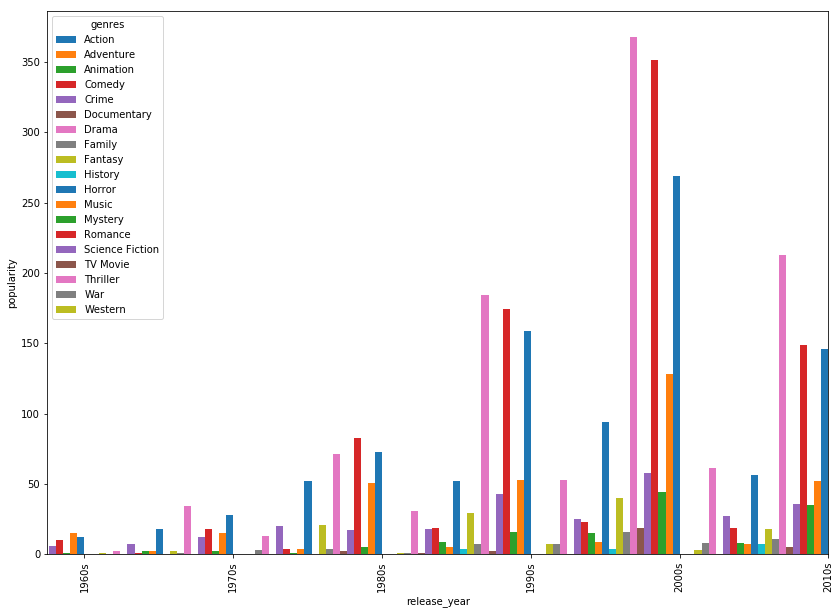

In [31]:
fig, ax = plt.subplots(figsize=(14,10))
df.groupby(["release_year","genres"])['popularity'].size().unstack().plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('popularity');

### Research Question 2  (Which Genres have The Highest average Revenue over Decades?)

In [32]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean)


TypeError: __init__() got an unexpected keyword argument 'max_rows'

genres              Action     Adventure     Animation        Comedy  \
release_year                                                           
1960s         2.731441e+08  3.839599e+08  3.126928e+08  2.481140e+08   
1970s         1.721027e+08  5.681115e+08  9.490723e+07  2.467087e+08   
1980s         1.140504e+08  2.278103e+08  1.472569e+08  1.117692e+08   
1990s         1.544116e+08  2.703597e+08  2.553253e+08  1.126970e+08   
2000s         1.320168e+08  3.114351e+08  3.171352e+08  8.824594e+07   
2010s         2.404300e+08  2.964165e+08  3.202405e+08  8.157684e+07   

genres               Crime   Documentary         Drama        Family  \
release_year                                                           
1960s         1.386940e+08           NaN  2.861995e+08  1.345551e+09   
1970s         1.335606e+08           NaN  2.791437e+08  2.154078e+07   
1980s         5.620388e+07  8.379384e+06  1.264792e+08  1.223186e+08   
1990s         1.559189e+08  4.651366e+07  1.087436e+08  4.01353

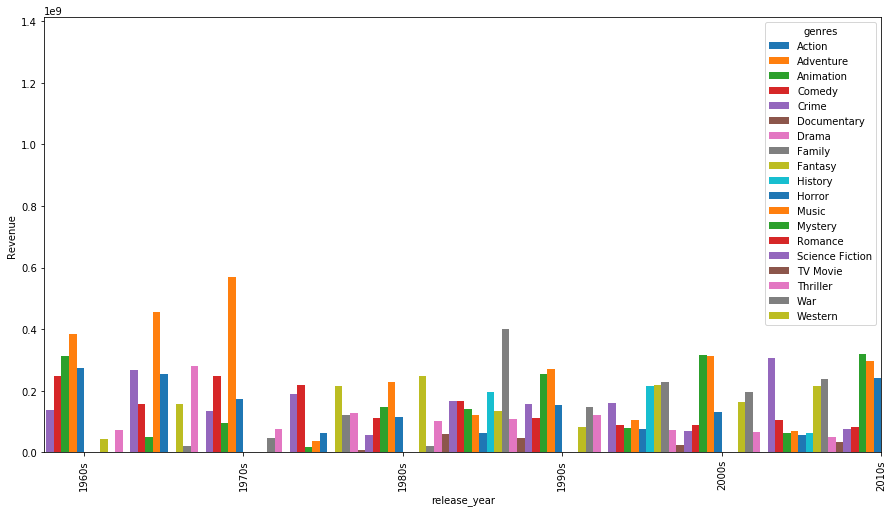

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
pd.pivot_table(df,index="release_year",columns="genres",values='revenue_adj',aggfunc=pd.Series.mean).\
plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('Revenue');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

Data Limitations:
1) There many NaN and zero values in the datasets which makes data cleaning challenging
2) Not all columns are necessary for data analysis

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])